In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [219]:

#df.to_numpy() converts df to numpy array without column names

In [220]:
df=pd.read_csv("C:/Users/Mohan/shiash/ML/Heart_attack_risk_prediction.csv")
df.head()#pathlocation where right slash is there

,Patient_ID,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [221]:
df.shape

(43400, 12)

In [222]:
#step`1:remove irrelevant features
#remove a column based on drop method

#shift+tab to know meaning of a function

In [223]:
df1=df.copy()##copy original dataset


In [224]:
df1.drop(columns=['Patient_ID'],inplace=True)

In [225]:
df1.head()

,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [226]:
df1.describe().head(8)
#what does mean heart disease of 0.04 mean?#what does mean hyperttension of 0.09 mean?
#1 means that patient has history of ht,0 means that patient has no ht.0.09 means?
#hypertension and heart disease have categories(0 and 1) which must have dtype of object.

,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Heart_Attack
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [227]:
df1.dtypes

Gender               object
Age                 float64
HyperTension          int64
Heart_Disease         int64
Is_Married           object
Employment_Type      object
Residential_type     object
Glucose_Levels      float64
BMI_Values          float64
Smoking_Habits       object
Heart_Attack          int64
dtype: object

In [228]:
#html-layout
#script-if i give improper username,pass error willl be displayed by script


#remove irrelevent columns,do null value treatment thenchange dtypes of some columna
#use df.describe,df.isnull.sum.meanmedianmode of all columns.


In [229]:
df1[['HyperTension','Heart_Disease']]=df1[['HyperTension','Heart_Disease']].astype('object')
#as type function will change the d type of both columns to object

In [230]:
df1.dtypes.head(4)

Gender            object
Age              float64
HyperTension      object
Heart_Disease     object
dtype: object

In [231]:
#check null values
df1.isnull().sum()

Gender                  0
Age                     0
HyperTension            0
Heart_Disease           0
Is_Married              0
Employment_Type         0
Residential_type        0
Glucose_Levels          0
BMI_Values           1462
Smoking_Habits      13292
Heart_Attack            0
dtype: int64

In [232]:
#BMI values and smoking habits have many null values
#ok 2 columns have null values.
#when the column is categorical which has n=many null values then we will impute null values with mode value
#or most relevent data


In [233]:
df1.BMI_Values.skew()      
#skewness of this col is 0.89 highly positively skewed distribution so we will do  median imputation

0.8987282500249906

In [234]:
df["Heart_Attack"].value_counts()

0    42617
1      783
Name: Heart_Attack, dtype: int64

In [235]:
a=df1['BMI_Values'].median()
df1['BMI_Values']=df1['BMI_Values'].fillna(a)

In [236]:
df1.BMI_Values.isnull().sum()

0

In [237]:
df1.Smoking_Habits.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: Smoking_Habits, dtype: int64

In [238]:
#most frequent class in the categorical variable sm habits is never smoked.So i will do mode imputation.

In [239]:
df1['Smoking_Habits']=df1['Smoking_Habits'].fillna('never smoked')

In [240]:
df1.Smoking_Habits.isnull().sum()

0

In [241]:
df1.head(3)
#drop(),astype(),null value imputation

,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0


In [242]:
df1['Glucose_Levels'].quantile(0.25)

77.54

In [243]:
df1.Glucose_Levels.describe()
#min gl is 55 and max gl is 300.

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: Glucose_Levels, dtype: float64

In [244]:
#perform scaling of num vars and  one hot encoding on categorical variables

In [245]:
df1_num = df1.select_dtypes(include=['int64','float64'])
df1_num1=df1_num.iloc[:,0:-1]
df1_num1.head(2)#this df has num vars only

,Age,Glucose_Levels,BMI_Values
0,3.0,95.12,18.0
1,58.0,87.96,39.2


In [246]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_num1_sc = pd.DataFrame(sc.fit_transform(df1_num1), columns = df1_num1.columns)
df1_num1_sc.head(3)

,Age,Glucose_Levels,BMI_Values
0,-1.741517,-0.217176,-1.384161
1,0.700823,-0.383258,1.390824
2,-1.519486,0.148621,-1.436520


In [247]:
df1_cat = df1.select_dtypes(include=['object'])
df1_cat.head().head(10)

,Gender,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Smoking_Habits
0,Male,0,0,No,children,Rural,never smoked
1,Male,1,0,Yes,Private,Urban,never smoked
2,Female,0,0,No,Private,Urban,never smoked
3,Female,0,0,Yes,Private,Rural,formerly smoked
4,Male,0,0,No,Never_worked,Rural,never smoked


In [248]:
df1_cat #cate vars

,Gender,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Smoking_Habits
0,Male,0,0,No,children,Rural,never smoked
1,Male,1,0,Yes,Private,Urban,never smoked
2,Female,0,0,No,Private,Urban,never smoked
3,Female,0,0,Yes,Private,Rural,formerly smoked
4,Male,0,0,No,Never_worked,Rural,never smoked
...,...,...,...,...,...,...,...
43395,Female,0,0,No,children,Urban,never smoked
43396,Female,0,0,Yes,Govt_job,Urban,formerly smoked
43397,Female,1,0,Yes,Private,Urban,formerly smoked
43398,Male,0,0,Yes,Private,Urban,never smoked


In [249]:
#since ht and hd columns have classses as 0 and 1 we do not create dummy variables.
#because both the cate vars are encoded as 0 and 1s.
#we need to encode gender,ismar,emptype,res,smhab


In [250]:
df1_cat1=df1_cat[['Gender','Is_Married','Employment_Type','Residential_type','Smoking_Habits']]



In [251]:
#cate data should not be fed into ml model because ml model wont work .
#As a machine can only understand numbers and cannot understand the text.
#

In [252]:
dummy= pd.get_dummies(df1_cat1,drop_first =False)
dummy.head(3)

,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0


# for i in df_Cat.columns:
#     print(df_cat[i].value_counts())


#by typing one code i can get the count of cate levels in each cate column.
#This code must be executed  to check if there are alien values like '?','-1'.
#When a col has -1 i will replace it with 0.


In [253]:
a=df1_cat.iloc[:,[1,2]]
a

,HyperTension,Heart_Disease
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
43395,0,0
43396,0,0
43397,1,0
43398,0,0


In [254]:
dummy1=pd.concat([dummy,a],axis=1)
dummy1 #has dummy vars

,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes,HyperTension,Heart_Disease
0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
4,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
43396,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
43397,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0
43398,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0


In [255]:
#df1_pre=pd.concat([df1_num1_sc,dummy1],axis=1)

In [256]:
df1_pre=pd.concat([df1_num1_sc,dummy1],axis=1)

In [257]:
df1_pre.head(3)#pre processed df to be fit into the model
#pre processed df has encoded cate vars and scaled num vars

,Age,Glucose_Levels,BMI_Values,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes,HyperTension,Heart_Disease
0,-1.741517,-0.217176,-1.384161,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
1,0.700823,-0.383258,1.390824,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,-1.519486,0.148621,-1.436520,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0


In [258]:
#df1_pre has dummy vars and scaled num vars.inp vars only.

In [259]:
#train test split
x=df1_pre
y=df1.iloc[:,[-1]]

#use drop,iloc and loc fun to put data in x and y var.
#

In [260]:
#y is a df with 1 column

In [261]:
# for i in y.Heart_Attack:
#     print(i)
y.head(3)

,Heart_Attack
0,0
1,0
2,0


In [262]:
#df1.Heart_Attack.value_counts()
#not smote analysed

In [263]:
df

,Patient_ID,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [264]:
#Train test split means split the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.3)
#in tts,we pass y as df not series

In [265]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30380, 20), (13020, 20), (30380, 1), (13020, 1))

In [266]:
#ml model like rf algo must be trained based on equal classes in tv.
#but our dataset has 39000 0s and 700 is in the t.v
#when the model gets trained with above dataset then model will not learn effectively.
#ml model will learn effectively when classes in tv are same.so we do SMOTE in tv.
 #this will install imblearn library/module

In [267]:
#!pip install imblearn

In [268]:
43000*0.3

12900.0

In [269]:
43000-13000

30000

In [270]:
df.Heart_Attack.value_counts()

0    42617
1      783
Name: Heart_Attack, dtype: int64

In [271]:
y_train.Heart_Attack.value_counts()

0    29813
1      567
Name: Heart_Attack, dtype: int64

In [272]:

from imblearn.over_sampling import SMOTE

In [273]:
sm=SMOTE()
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [274]:
#40000 records,39000 have 0 in t.v
#700 records which have 1

In [275]:
x_train_sm.shape,y_train_sm.shape

((59626, 20), (59626, 1))

In [276]:
x_train_sm

,Age,Glucose_Levels,BMI_Values,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes,HyperTension,Heart_Disease
0,0.212355,-0.354960,0.801794,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0.0,0.0
1,0.567604,-0.432665,-0.533340,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0,0.0
2,1.322509,2.686706,0.762525,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0.0,0.0
3,0.345574,-0.520346,1.534809,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0,1.0
4,0.878448,-0.939958,0.579272,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59621,1.608114,-0.051662,-0.125681,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1.0,1.0
59622,1.435743,0.136270,-0.411142,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1.0,0.0
59623,1.025456,-0.307602,-0.052961,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0.0,0.0
59624,1.589468,1.411490,0.529321,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1.0,1.0


In [277]:
y_train_sm

,Heart_Attack
0,0
1,0
2,0
3,0
4,0
...,...
59621,1
59622,1
59623,1
59624,1


In [278]:
#x_train_sm and y_train_sm are sorted in ascending order.

In [279]:
x_test.sort_index(axis=0,ascending=True,inplace=True)

In [280]:
x_test

,Age,Glucose_Levels,BMI_Values,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes,HyperTension,Heart_Disease
0,-1.741517,-0.217176,-1.384161,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
1,0.700823,-0.383258,1.390824,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,-1.519486,0.148621,-1.436520,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
5,0.212355,2.469593,2.817585,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
17,-0.009676,-0.505964,-0.795131,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43382,-1.475080,-0.834881,-1.541236,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
43385,1.056072,-0.287228,-0.494072,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
43392,-1.075424,0.637357,-0.755863,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
43394,0.212355,-0.834185,-0.441714,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0


In [281]:
y_test.sort_index(axis=0,ascending=True,inplace=True)

In [282]:
y_test.head(2)

,Heart_Attack
0,0
1,0


In [283]:
y_train_sm.Heart_Attack.value_counts()
#num of 1 s is 29k and num of 0 is 29k.

0    29813
1    29813
Name: Heart_Attack, dtype: int64

In [284]:
#(y_train_sm.values)
#type(y_train_sm.values.tolist())# 2d list with smote actual op values
#i want 1 d series only.

In [285]:
#DataFrame is a two-dimensional data structure and it consists of rows and columns in form of a tabular format, 
#which is used to store the data.
#Whereas a list is a single-dimensional data structure and it stores the collection of Data.
#df.values().tolist()

In [286]:
#(say) earlier there were 70 records of ip features as xtr and their op classes are ytrain
#now duplicaterecords of ip features created xtrain_sm.their duplicate op created ytrain_sm
#ytrain has 60 os and 10 1s .ytrain_sm has 70 0s and 70 1s.

In [287]:
#1)Build logistic regressioin model
from sklearn.linear_model import LogisticRegression

In [288]:
lr=LogisticRegression()

In [289]:
logreg=lr.fit(x_train_sm,y_train_sm)
logreg
#Model gets trained with all scenarios as there are equal number of 1s and 0s in y_train_sm.
#Model must get trained with smote applied
#xtrain and y_train.Else ml model will be biased/partial to people who do not get a
#heart attack.

c:\Users\Mohan\anaconda3\envs\base_2\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mohan\anaconda3\envs\base_2\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [290]:
y_pred=logreg.predict(x_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [291]:
from sklearn.metrics import confusion_matrix 

In [292]:
cm= confusion_matrix(y_test, y_pred)  
#y_true=1 d 
#y_pred is 1d

In [293]:
cm
#Read the documentation:
#cm displays actual op values along x axis and predicted op values along y axis.

array([[10208,  2596],
       [   78,   138]], dtype=int64)

In [294]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [295]:
#y_test.Heart_Attack

In [296]:
#Display accuracy,precision,recall,fn of test data when we build logreg model.
#These metrcis are calculated w.r.t test data only.


In [297]:
accuracy_score(y_true=y_test.Heart_Attack,y_pred=y_pred)

0.7946236559139785

In [298]:
precision_score(y_test.Heart_Attack,y_pred)

0.05047549378200439

In [299]:
recall_score(y_test.Heart_Attack,y_pred)

0.6388888888888888

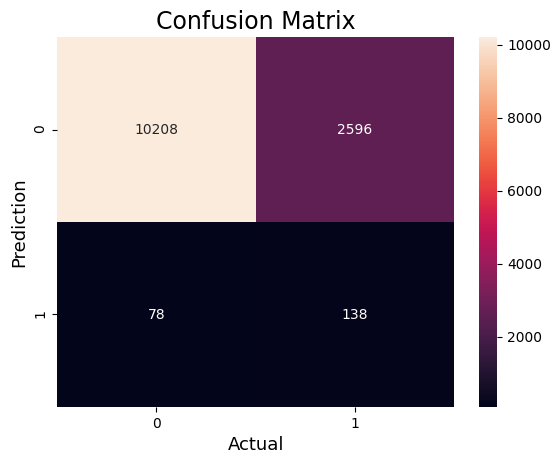

In [300]:
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
#tn count is high means it is not  a bad model.It is a good model.
#for actual 0s model has predicted 0s.so it is accurate predictions
#tn=10k d n conf
#len(y_test) is 12900.It will obviously have many 0s and few 1s.That is the reason for less TP
#i.eTP=22 and high Tn i.e TN=12375.The dataset is formed with many 0s.It is not our fault.

In [301]:
print("Count of false negative values when we build logistic reg model on test data is ",cm[0][1]) 

Count of false negative values when we build logistic reg model on test data is  2596


In [302]:
#let us try predict_proba function

In [303]:

#predict_proba fun returns for each dp for class 0 and classs 1 it displays the probability value.
#high prob value at label 1 means that person at row index 0 will get heart attack.

In [304]:
y_test.head(3)

,Heart_Attack
0,0
1,0
2,0


In [305]:
y_pred[0:7]#predicted op values of test data at position 0 to position 7-1

array([0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [306]:
# y_predprobl[0:7]

In [307]:
# y_predprobl.shape

In [308]:
# len(y_test)

In [309]:
# y_predprobl

In [310]:
# y_predprobl[2,0]
# a 2 d array has 2 parameters.1 st para represents sublist positions
#2 nd parameter represents positions in a list
#in ypredprob 2d array,at index 2 there is a sublist.in the sublist at index 0,a value is displayed.


<!-- # #You told me that predict_proba() returns each data point's 
# probability of class 0 and class 1.
# For data point at row index 0,what is the probability of class 1? 0.99 or 0.0008?
#atochatgpt

#Probability of class 0: approximately 9.99179770e-01 (which is close to 1)
Probability of class 1: approximately 8.20230143e-04 (which is close to 0)
Therefore, for the data point at row index 0, the probability of belonging to class 1 is approximately 8.20230143e-04 or 0.0008. -->
        class 0          class 1

#array([[9.99179770e-01, 8.20230143e-04],
       [4.97744642e-01, 5.02255358e-01],
       [9.98883407e-01, 1.11659339e-03],
       [8.84060817e-01, 1.15939183e-01],
       [9.99288156e-01, 7.11844229e-04]])

In [311]:
# y_predprobl[0:5]
#it displays sublists in a range.start to stop-1.sublist at index 0 to sublist at index 4 i.e 5-1
#dp1-0,dp2-1,dp3-0,dp4-0,dp5-0

In [312]:
# y_predl[0:5]

In [313]:
#roc_curve,roc_score .we pass prob values in both the functions.

In [314]:
# (8.2*10**-4)*100

y_predprobl is a aray which has probability values of each record.
1 st record is 99 percent sure it will be label 1
1 st reocrd is 0.08 percent sure it will be label 0
the probability of 1 st record to be label 1 is 99 percent.
#generally models make accurate predictions.
#so 1 st record is label 1...c.j


In [315]:
from sklearn.metrics import roc_auc_score,roc_curve

In [316]:
# y_test.head(2)# #not sorted in ascending order.we need to do it.still u get correct ans

In [317]:
len(y_test)

13020

In [318]:
#roc_auc_score : Compute the area under the ROC curve

In [319]:
#In roc_curve function,i pass for all dp i pass prob of label 1.
#in the roc_curve fun i do not pass prob of label 0.

In [320]:
# Roc curve codes:

In [321]:
# generate a no skill prediction (majority class)
##predicted probability of the positive class is always zero.
ns_probs = [0 for _ in range(len(y_test))]

In [322]:
y_predprob=logreg.predict_proba(x_test)


In [323]:
y_predprob[:7]

array([[9.99062560e-01, 9.37440141e-04],
       [5.75401431e-01, 4.24598569e-01],
       [9.96975203e-01, 3.02479693e-03],
       [7.82733104e-01, 2.17266896e-01],
       [8.06803295e-01, 1.93196705e-01],
       [8.96652094e-01, 1.03347906e-01],
       [1.31910414e-01, 8.68089586e-01]])

In [324]:
#In the test data,the dp at index 6,model predicts that there is 86.6% chance that
#it will be label 1.These is 13 percent chance that this dp will be label 0.
#logreg.predict_proba(x_test) fucntion predicts for all dp it predicts the probabiltites of label 0 and label 1.
#logreg.predict(x_test) function predcits the target variable labels.


In [325]:
#A 2d array variable is present.i have preformed slicing in 2 d array.i have sliced range 
# of elements from index position 0 to inde position 7-1.
#In a 2d array,I slice a range of elements  from index 0 to index 7-1

In [326]:
lr_probs =y_predprob[:,1]  
#this is a 1d array which has probability values for label 1

In [327]:
lr_probs

array([0.00093744, 0.42459857, 0.0030248 , ..., 0.00641365, 0.02055176,
       0.16513859])

In [328]:
ns_auc = roc_auc_score(y_test.Heart_Attack, ns_probs)
lr_auc = roc_auc_score(y_test.Heart_Attack, lr_probs)

In [329]:
ns_auc

0.5

In [330]:
lr_auc
#lr_auc is the auc score for label 1 of logistic regression model(true)

0.8186504217432053

In [331]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.819


In [332]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.Heart_Attack, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.Heart_Attack, lr_probs)

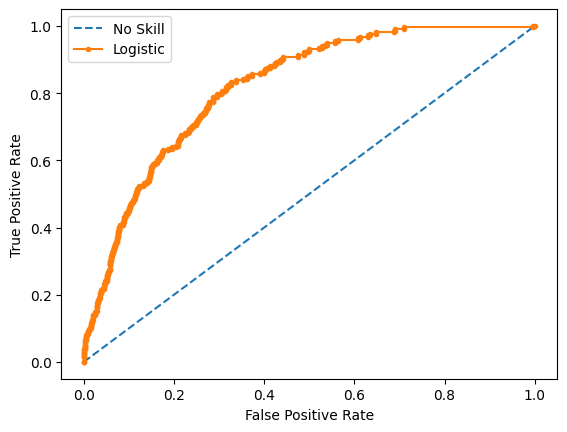

In [333]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [334]:
roc_auc_score(y_true=y_test.Heart_Attack,y_score=y_predprob[:,1])



0.8186504217432053

In [335]:
#roc_curve :The function returns three arrays: fpr (false positive rate),tpr (true positive rate) and thresholds.

In [336]:
fpr, tpr, thresholds =roc_curve(y_true=y_test.Heart_Attack,y_score=y_predprob[:,1])

In [337]:
fpr[0:5]

array([0.00000000e+00, 7.81005936e-05, 1.56201187e-04, 1.56201187e-04,
       5.46704155e-04])

In [338]:
tpr[200:240]
#tpr value increases but fpr values remains around 0.

array([0.5       , 0.50462963, 0.50462963, 0.50925926, 0.50925926,
       0.51388889, 0.51388889, 0.51851852, 0.51851852, 0.52314815,
       0.52314815, 0.52777778, 0.52777778, 0.53240741, 0.53240741,
       0.53703704, 0.53703704, 0.54166667, 0.54166667, 0.5462963 ,
       0.5462963 , 0.55092593, 0.55092593, 0.55555556, 0.55555556,
       0.56018519, 0.56018519, 0.56481481, 0.56481481, 0.56944444,
       0.56944444, 0.57407407, 0.57407407, 0.5787037 , 0.5787037 ,
       0.58333333, 0.58333333, 0.58796296, 0.58796296, 0.59259259])

In [339]:
thresholds[0:5]

array([       inf, 0.96520467, 0.95188754, 0.94302173, 0.93772711])

In [340]:
#Do not pass y_pred in roc curve and rocauc score functions.(rule)

In [341]:
#i am not getting a curve.task:what are the values of fpr,tpr and thresh.What r  the values in 
#1 d array

In [342]:
roc_auc_score(y_true=y_test.Heart_Attack,y_score=y_predprob[:,1])

0.8186504217432053

In [343]:
#ValueError: y should be a 1d array and  got an array of shape (13020, 2) instead
#You must pass probability values in 1 d array.By default probvalues are in 2 d array.
#u must pass prob values in 1 d array.maybe we must pass prob values of label1 orprob
#values of label 0
#y_true=(n_samples,) or (n_samples, n_classes)
#it means we can pass a series or a df with one column

In [344]:
# y_predprobl[:,1]

In [345]:
# fpr, tpr, thresholds = roc_curve(y_test.Heart_Attack, y_predprobl[:,1],pos_label=1)
#We set pos_label=1,we get correct roc curve
#pos_label=1 means pos_label=1: This parameter specifies which class is considered the positive class.
#In this case, it's set to 1, indicating that class 1 (Heart_Attack) is the positive class.
#we set pos_label=0,we get different(wrong) curve.

In [346]:
# ns_probs[0:5]

In [347]:
#After calling roc_curve with your parameters, it returns three arrays:

#fpr: An array of false positive rates for different threshold values.
#tpr: An array of true positive rates for different threshold values.
#thresholds: An array of thresholds used to compute the false positive and true positive rates.

In [348]:
y_predprob[:,1] #displays the predicted probabilities for the positive class for all dp.


array([0.00093744, 0.42459857, 0.0030248 , ..., 0.00641365, 0.02055176,
       0.16513859])

roc_curve() has 2 para.1 st para must have act op values.2nd para must be set as 
prob values of label 1.(we can set prob values of label 0 too..not recommended)
(note:)
In roc_auc_score() and roc_curve() functions,in the 2 nd parameter we must pass probability
values of class 1.

In [349]:
fpr[0:5]

array([0.00000000e+00, 7.81005936e-05, 1.56201187e-04, 1.56201187e-04,
       5.46704155e-04])

In [350]:
len(fpr)

415

In [351]:
len(tpr)

415

In [352]:
len(thresholds)

415

In [353]:
#We use predict_proba fun on x test.It is used to plot roc curve.
#We use predict fun on x test for acc,fn,precision,recall.

In [354]:
#######################################################################################################

In [355]:
#

In [356]:
#I compare the probability of class1 of all the data points with different values of threshold.
#I pass these probabilities in roc_curve function.
#method2:
#when we pass prob values as a 2 d array then we must mention pos_label=1.Only then model
#will take for all dp it will take class 1 probabilities.

In [357]:
#true_positive_rate and  false_positive_rate are arrays.
#These are calculated from roc_curve().


In [358]:
#roc curve can be plotted for all the labels.
#In one graph we can plot roc curve for label 0.
#In the same graph we can plot roc curve for label 1.

#predict(test data) returns discrete values (like 0,1) to each record.
#predict_proba() returns probability value or likelihood for each label.

In [359]:
#The AUC score can be computed using the roc_auc_score() method of sklearn.

In [360]:
#predict_proba() returns the probabilities of each category (cat and dog), i.e., 0.95 and 0.05.

In [361]:
#2)Run Random forest model

In [362]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators=500,criterion="entropy",min_samples_split=2,min_samples_leaf=1,random_state=45)  
rfc=classifier.fit(x_train_sm, y_train_sm.Heart_Attack) 
#RFModel named rfc gets trained on xtr and y train data

In [363]:
y_pred1= rfc.predict(x_test) 

In [364]:
from sklearn.metrics import confusion_matrix  
cm1= confusion_matrix(y_test, y_pred1)  

In [365]:
cm1

array([[12393,   411],
       [  194,    22]], dtype=int64)

In [366]:
#Display accuracy,precision,recall,fn of test data when we build random forest model.
#These metrcis are calculat//ed w.r.t test data only.


In [367]:
accuracy_score(y_true=y_test.Heart_Attack,y_pred=y_pred1)

0.9535330261136713

In [368]:
precision_score(y_test.Heart_Attack,y_pred1)

0.050808314087759814

In [369]:
recall_score(y_test.Heart_Attack,y_pred1)

0.10185185185185185

In [370]:
print("Count of false negative values when we build random forest model on test data is ",cm1[0][1]) 

Count of false negative values when we build random forest model on test data is  411


ROC CURVE OF RANDOM FOREST MODEL

In [371]:
y_predprob2=rfc.predict_proba(x_test)

In [372]:
y_predprob2[10:16]

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [0.954, 0.046],
       [0.434, 0.566],
       [0.962, 0.038],
       [0.83 , 0.17 ]])

In [373]:
#y_predprob2 consits of for all dp probability values of label 0 and label 1 based on random forest model.
#for dp at index 15,the rf model predicts that 80 percent chance that it will be label 0
#20 percent chance that it will be label 1.

In [374]:
y_predprob2[0:6][:,1]#this code displays the prob of label1 for 6 test datapoints.

array([0.   , 0.166, 0.   , 0.028, 0.002, 0.   ])

In [375]:
y_predprob2[:,1][0:6]#this code also displays the prob of label1 for 6 test datapoints.

array([0.   , 0.166, 0.   , 0.028, 0.002, 0.   ])

In [376]:
# generate a no skill prediction (majority class)
##predicted probability of the positive class is always zero.
ns_probs = [0 for _ in range(len(y_test))]

In [377]:
rf_probs=y_predprob2[:,1]

In [378]:
rf_probs

array([0.   , 0.166, 0.   , ..., 0.   , 0.06 , 0.008])

In [379]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.Heart_Attack, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_true=y_test.Heart_Attack,y_score=rf_probs)

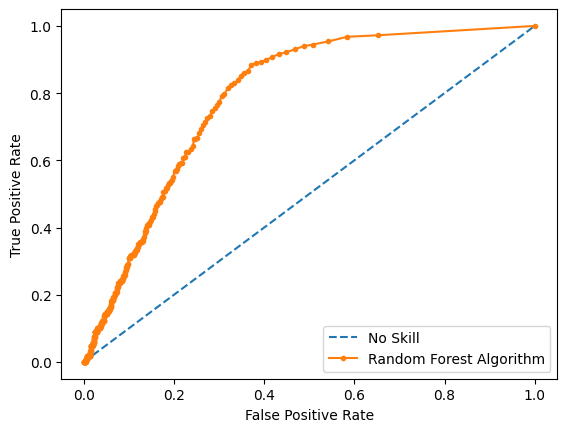

In [380]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Algorithm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [381]:
roc_auc_score(y_true=y_test.Heart_Attack,y_score=rf_probs)

0.7904212153030882

3) Decision Tree algorithm

In [382]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [383]:
#A feature which has high i.g and low gini index is used to split the dataset.

In [384]:
dtc = DecisionTreeClassifier(criterion = "gini",random_state = 100,
                                  max_depth=3, min_samples_leaf=5)

In [385]:
dtree=dtc.fit(x_train_sm,y_train_sm)

In [386]:
#store dt1 model then use predict fun

In [387]:
y_pred3=dtree.predict(x_test)

In [388]:
y_test.shape,y_pred3.shape

((13020, 1), (13020,))

In [389]:
y_test.Heart_Attack.head(10)

0     0
1     0
2     0
5     0
17    0
18    0
19    0
31    0
32    0
33    0
Name: Heart_Attack, dtype: int64

In [390]:
y_pred3[0:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [391]:
cm2=confusion_matrix(y_test.Heart_Attack,y_pred3)
cm2

array([[8602, 4202],
       [  41,  175]], dtype=int64)

In [392]:
cm2[0][0]

8602

In [393]:
cm2[1][1]

175

In [394]:
# (cmm[0][0]+cmm[1][1])/len(y_pred)#total prediction

In [395]:
accuracy_score(y_test.Heart_Attack,y_pred3)
#81% of data are correctly predicted data points in the test data.
#19% of data are incorrectly predicted datapoints in the test data

0.6741167434715822

In [396]:
recall_score(y_test.Heart_Attack,y_pred3)

0.8101851851851852

In [397]:
precision_score(y_test.Heart_Attack,y_pred3)

0.03998172264107836

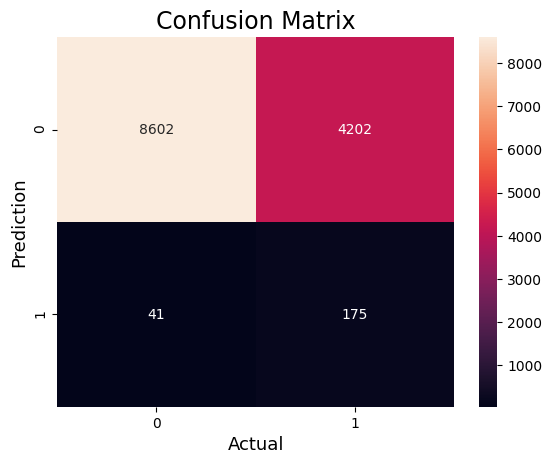

In [398]:
#Plot the confusion matrix.
sns.heatmap(cm2, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [399]:
print("Count of false negative values when we build decision tree model on test data is ",cm2[0][1]) 

Count of false negative values when we build decision tree model on test data is  4202


In [400]:
#DT model has low accuracy and high false negatives.Do not consider DT model.Our False negative count must be very very less.

In [401]:
#You can perform L.e or O.h.e.The accuracy of logreg,rf models will not be affected based on ohe or le.
#Fn means count of fn only.it is wrt count or frequency only.

In [402]:
#ROC curve in decision tree algorithm

In [403]:
dtree

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [404]:
y_predprob3=dtree.predict_proba(x_test)

In [405]:
y_predprob3[:,1][0:5]
#for 5 dp iin test data,decision tree model predicts probabilities of label 1.

array([0.02280868, 0.50427183, 0.02280868, 0.33807411, 0.33807411])

In [406]:
y_pred3[0:5]#predicted op labels of 5 dpoints in test data.

array([0, 1, 0, 0, 0], dtype=int64)

In [407]:
# generate a no skill prediction (majority class)
##predicted probability of the positive class is always zero.
ns_probs = [0 for _ in range(len(y_test))]

In [408]:
dt_probs=y_predprob3[:,1]

In [409]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.Heart_Attack, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_true=y_test.Heart_Attack,y_score=dt_probs)

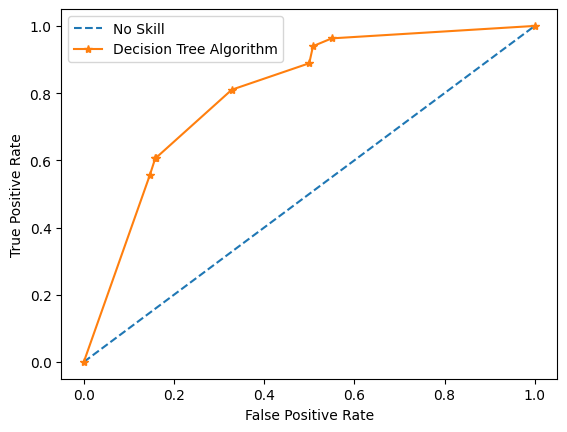

In [410]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='*', label='Decision Tree Algorithm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [411]:
roc_auc_score(y_true=y_test.Heart_Attack,y_score=dt_probs)

0.8027448381292882

In [412]:
#   Model Name              Accuracy  False negatives  Precision  Recall  ROC AUC Score
#1)Logistic Regression      0.79      2622             0.05       0.64    0.81
#2)Decision Tree Algorithm  0.67      4192             0.04       0.8     0.8
#3)Random Forest Algorithm  0.95      415              0.04       0.08    0.80


In [413]:
#Conclusion:

In [414]:
#Random Forest Classifier is the best model.IT has high accuracy,least number of False negatives and High ROC AUC score.